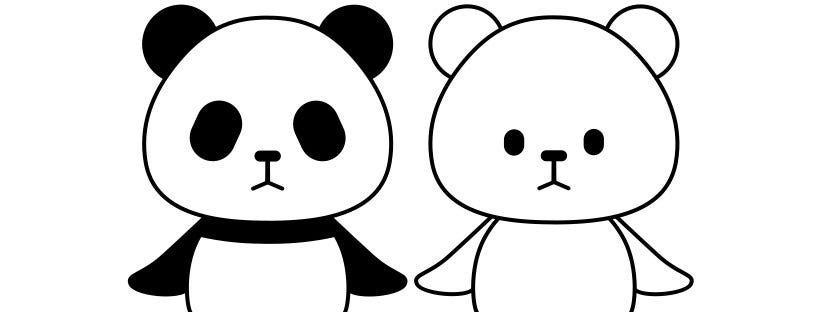

The following material is a result of combining multiple sources and examples. The backbone of it with most explanation and in depth material is: https://github.com/braaannigan/polars

# What is polars?
 
* Polars is a library for working with and manipulating dataframe that is typically used for data loading, transformation and analysis.
* It works conveniently with CSV files, Excel spreadsheets, json etc...
* It is a faster alternative to pandas

# Why polars vs pandas?

* Polars is much faster.
* Polars implements under-the-hood code optimization, including native parallelization.
* Polars code is easy and pandas-like.

In [1]:
# Import both libraries

import polars as pl
import pandas as pd
from IPython.display import Image

In [2]:
# Sample dataset ~ 14000 rows and 20 columns

csv_file = 'datasets/RankingsCombined.csv'
pl.scan_csv(csv_file, ignore_errors=True).head(5).collect()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio
i64,i64,i64,str,f64,i64,f64,i64,str,i64,str,i64,f64,i64,f64,i64,str,str,str,bool,bool,str,str,str,str
0,1,1,"""Harvard Univer…",96.1,1,99.7,1,"""72.4""",49,"""34.5""",105,98.7,2,98.8,8,"""United States""","""Harvard Univer…","""Mathematics & …",false,false,null,null,null,null
1,2,2,"""California Ins…",96.0,2,97.7,4,"""54.6""",93,"""83.7""",24,98.0,4,99.9,1,"""United States""","""California Ins…","""Languages, Lit…",false,false,null,null,null,null
2,3,3,"""Massachusetts …",95.6,3,97.8,3,"""82.3""",36,"""87.5""",21,91.4,11,99.9,2,"""United States""","""Massachusetts …","""Mathematics & …",false,false,null,null,null,null
3,4,4,"""Stanford Unive…",94.3,4,98.3,2,"""29.5""",156,"""64.3""",33,98.1,3,99.2,6,"""United States""","""Stanford Unive…","""Physics & Astr…",false,false,null,null,null,null
4,5,5,"""Princeton Univ…",94.2,5,90.9,6,"""70.3""",53,"""-""",164,95.4,5,99.9,3,"""United States""","""Princeton Univ…","""Languages, Lit…",false,false,null,null,null,null


In [73]:
# Polars data read performance

%timeit -n1 -r1 pl.read_csv(csv_file, ignore_errors=True)

25.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [74]:
# Pandas data read performance

%timeit -n1 -r1 pd.read_csv(csv_file)

68 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [75]:
# Optimized pandas data read performance

%timeit -n1 -r1 pd.read_csv(csv_file, engine = 'pyarrow')

17.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Query optimization

By default, polars also optimizes queries, which makes them easier to read and write. 

For example, here is a comparinsong of getting an average and maximum values grouping by the location.

In [64]:
# Polars aggregation

%timeit -n1 -r1 pl.scan_csv(csv_file, ignore_errors = True).groupby('location').agg([pl.col('scores_industry_income_rank').mean().suffix('_mean'), pl.col('scores_industry_income_rank').mean().suffix('_max')]).collect()

13.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [65]:
 # Pandas aggregation

%timeit -n1 -r1 pd.read_csv(csv_file).groupby('location').agg({'scores_industry_income_rank': ['mean', 'max']})

67.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [72]:
# Polars vs pandas aggregation

%timeit -n1 -r1 pd.read_csv(csv_file, engine = 'pyarrow', usecols = ['location', 'scores_industry_income_rank']).groupby('location').agg({'scores_industry_income_rank':['mean', 'max']})

9.58 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


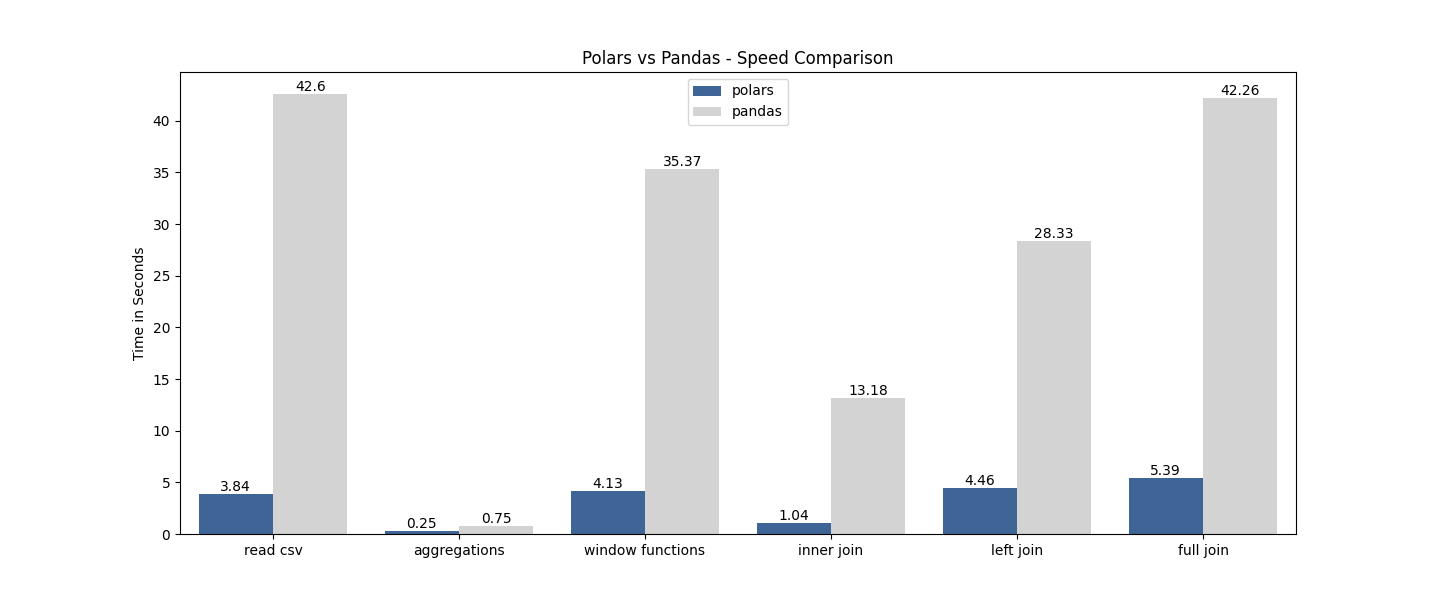

In [5]:
Image(filename='imgs/barchart_benchmark.png')

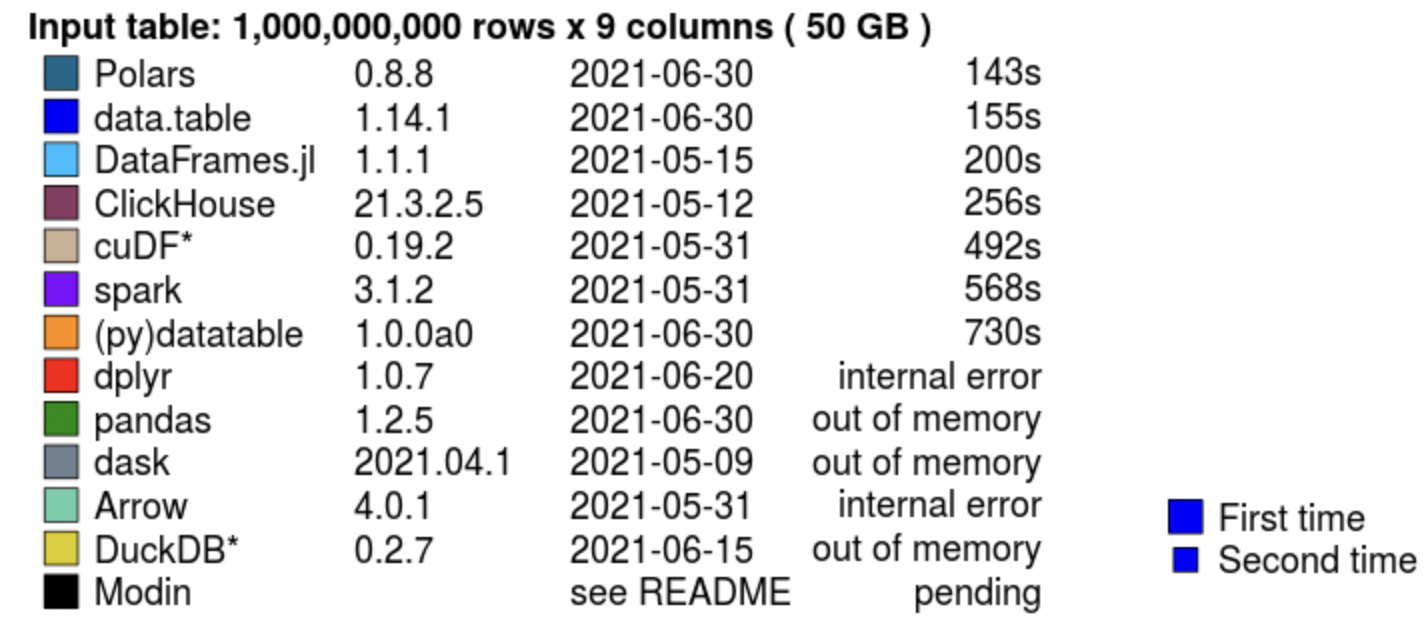

In [10]:
Image(filename='imgs/50gb.png')

# Conclusion

Even on a relatively small dataset polars is about 3 times faster than pandas and about 2 times faster than using pandas with optimization.